In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit
%matplotlib inline
import os

In [4]:
filename = '/home/xams/lena/run8/processed/NaI_only/171121_133449.hdf5'

if not os.path.exists(filename):
    raise FileNotFoundError("not found")
    
store = pd.HDFStore(filename, mode='r')
data= store['all_hits']
pulses = store['Pulse']
data['baseline'] = pulses[pulses['channel'] == 0]['baseline']

print(len(data))
data.dtypes

349090


Event                       int64
area                      float64
center                    float64
channel                     int64
found_in_pulse              int64
height                    float64
index_of_maximum            int64
is_rejected                  int8
left                        int64
left_central                int64
n_saturated                 int64
noise_sigma               float64
right                       int64
right_central               int64
sum_absolute_deviation    float64
baseline                  float32
dtype: object

In [4]:
bgr = data
bgr.head()

,Event,area,center,channel,found_in_pulse,height,index_of_maximum,is_rejected,left,left_central,n_saturated,noise_sigma,right,right_central,sum_absolute_deviation,baseline
0,0,0.033317,2103.794296,0,0,0.004110,1045,0,1000,1000,0,0.000014,1375,1375,8.772003,-52.380001
1,1,0.016450,2107.357627,0,0,0.002332,1045,0,1000,1000,0,0.000016,1375,1375,12.894160,-52.119999
2,2,0.026172,2123.568010,0,0,0.003570,1048,0,1000,1000,0,0.000013,1375,1375,20.877881,-52.580002
3,3,0.024538,2127.411943,0,0,0.002873,1049,0,1000,1000,0,0.000015,1375,1375,21.811953,-52.139999
4,4,0.191894,2121.818933,0,0,0.025841,1051,0,1000,1000,0,0.000013,1375,1375,13.816346,-52.700001


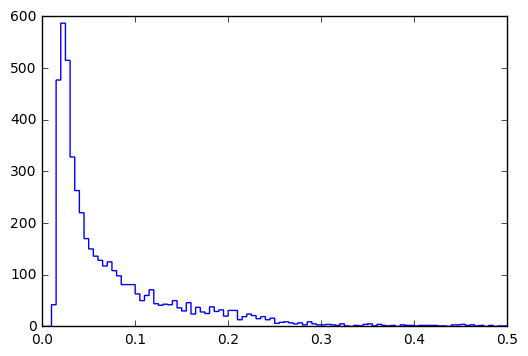

In [8]:
bgr.head()
plt.hist(bgr['area'],bins=100, range=(0,0.5), histtype='step')
#plt.yscale('log')
plt.show()

In [16]:
filename = '/home/xams/bla-cs.hdf5'

if not os.path.exists(filename):
    raise FileNotFoundError("not found")
    
store = pd.HDFStore(filename)
cs= store['all_hits']
pulses = store['Pulse']
cs['baseline'] = pulses[pulses['channel'] == 0]['baseline']

print(len(cs))
cs.dtypes

248005


Event                       int64
area                      float64
center                    float64
channel                     int64
found_in_pulse              int64
height                    float64
index_of_maximum            int64
is_rejected                  int8
left                        int64
left_central                int64
n_saturated                 int64
noise_sigma               float64
right                       int64
right_central               int64
sum_absolute_deviation    float64
baseline                  float32
dtype: object

In [17]:
cs.head()

,Event,area,center,channel,found_in_pulse,height,index_of_maximum,is_rejected,left,left_central,n_saturated,noise_sigma,right,right_central,sum_absolute_deviation,baseline
0,0,0.048912,2344.230242,0,0,0.000424,1093,0,1000,1000,0,0.000020,1375,1375,60.405711,-43.680000
1,1,0.042806,2347.771544,0,0,0.000368,1091,0,1000,1000,0,0.000019,1375,1375,60.682029,-44.240002
2,2,0.076970,2344.498866,0,0,0.000642,1104,0,1000,1000,0,0.000020,1375,1375,60.383762,-44.279999
3,3,0.091528,2354.803431,0,0,0.000751,1117,0,1000,1000,0,0.000018,1375,1375,60.384759,-44.580002
4,4,0.063855,2349.571887,0,0,0.000541,1093,0,1000,1000,0,0.000019,1375,1375,57.998822,-44.959999


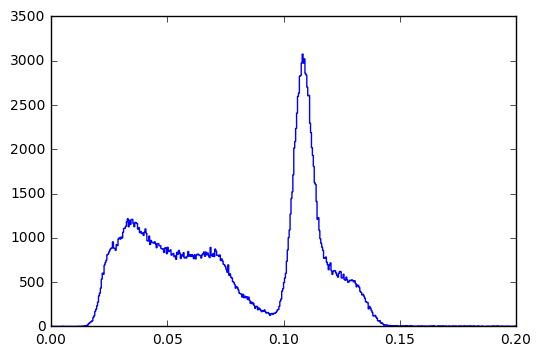

In [19]:
plt.hist(cs['area'],bins=500,range=(0,0.2), histtype='step',
         label='Caesium')
#plt.hist(bgr['area'],bins=100,range=(0,0.2e6),histtype='step',
#label='Background')
#plt.yscale('log')
plt.show()

500


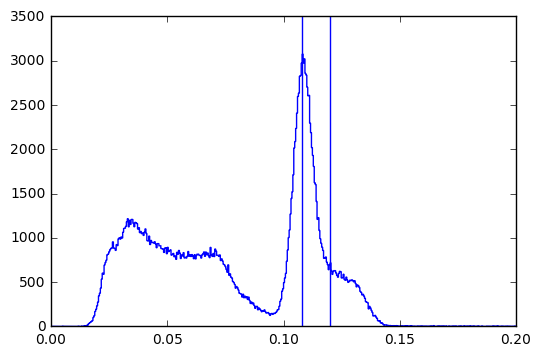

In [20]:
y, x, _ = plt.hist(cs['area'],bins=500,range=(0,0.2), histtype='step',
                   label='Caesium')
bin_iter = 0
ymax = y.max()
for i in y:
    bin_iter +=1
    #if y == ymax:
      #  break
print(bin_iter)
plt.axvline(0.12)
plt.axvline(0.108)

In [32]:
filename = '/home/xams/bla-cs-2809-3.hdf5'

if not os.path.exists(filename):
    raise FileNotFoundError("not found")
    
store = pd.HDFStore(filename)
data= store['all_hits']
pulses = store['Pulse']
data['baseline'] = pulses[pulses['channel'] == 0]['baseline']

print(len(data))
data.dtypes

65148


Event                       int64
area                      float64
center                    float64
channel                     int64
found_in_pulse              int64
height                    float64
index_of_maximum            int64
is_rejected                  int8
left                        int64
left_central                int64
n_saturated                 int64
noise_sigma               float64
right                       int64
right_central               int64
sum_absolute_deviation    float64
baseline                  float32
dtype: object

Weirdos still present when background adjusted to 1000 samples (rather than 200). Time after trigger adjusted to 3.5 us. New data run done and completely different results observed.

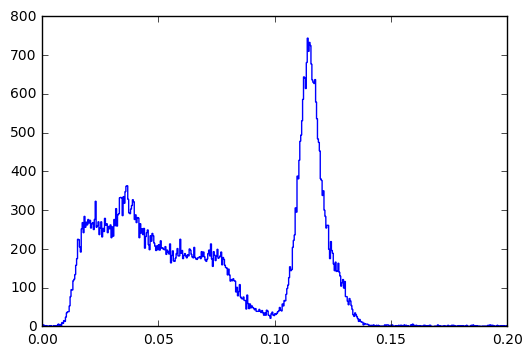

In [35]:
plt.hist(data['area'],bins=500, histtype='step',
         label='Caesium ', range=(0, 0.2))
plt.show()

In [11]:
for _d in (cs, weirdos):
    plt.hist(_d['baseline'], bins=100, histtype='step', 
         normed=True, range=(-50, -20))


NameError: name 'weirdos' is not defined

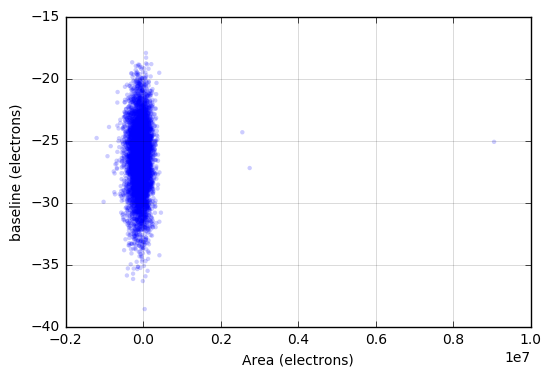

In [19]:
plt.scatter(data['area'], data['baseline'], edgecolor = 'none', s=10, alpha = 0.2)
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel("Area (electrons)")
plt.ylabel("baseline (electrons)")
plt.grid(alpha=0.2, linestyle='-')
# plt.ylim([0,300000])
#plt.xlim([1000000, 7000000])
plt.show()

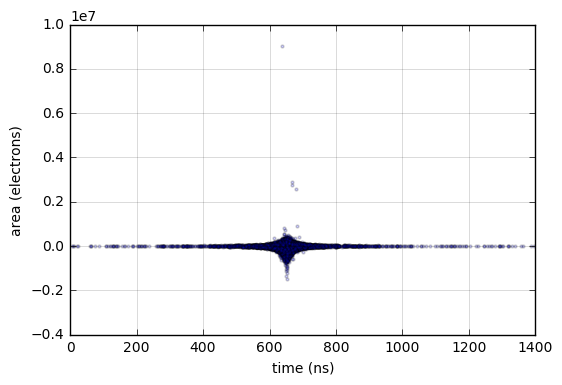

In [20]:
plt.scatter(data['center'], data['area'], s=4, alpha = 0.2)
# plt.yscale('log')
plt.xlabel("time (ns)")
plt.ylabel("area (electrons)")
plt.grid(alpha=0.2, linestyle='-')
plt.xlim([0, 1400])
plt.show()

400
400


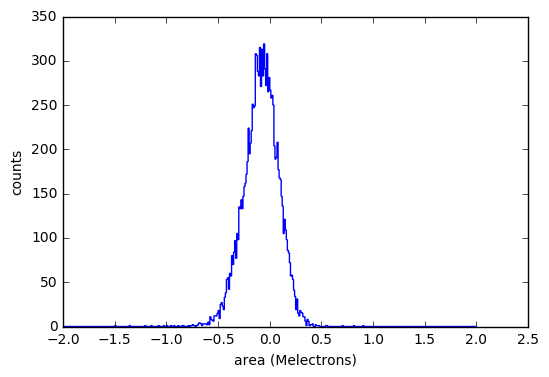

In [21]:
histboundaries = [-2, 2]
histbinwidth = 0.01
histbins = np.arange(histboundaries[0], histboundaries[1]+histbinwidth, histbinwidth)
centers = np.arange(histboundaries[0]+histbinwidth/2.0, histboundaries[1], histbinwidth)

melecs = data['area']/1e6

hist = plt.hist(melecs, bins=histbins, histtype='step')
counts = hist[0]
countserr = [np.sqrt(t)+1 for t in counts]

plt.xlabel("area (Melectrons)")
plt.ylabel("counts")
# plt.xscale('log')
# plt.xlim(-1,2)
# plt.ylim(0,1800)


print(len(centers))
print(len(counts))

[  2.93073529e+02  -8.11788653e-02   1.60406021e-01]
[  2.28828913e+00   1.07226855e-03   8.13235196e-04]
  
[[  5.23626715e+00   1.46335545e-04  -1.09177029e-03]
 [  1.46335545e-04   1.14975985e-06  -8.38984542e-08]
 [ -1.09177029e-03  -8.38984542e-08   6.61351485e-07]]


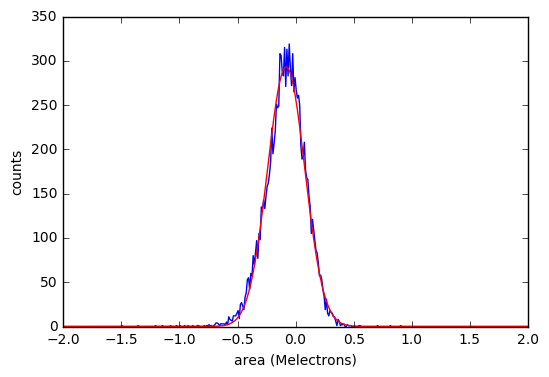

In [22]:
def gauss(x, a, b, s):
    return a * np.exp(-(x-b)**2/(2*s**2))


popt, pcov = curve_fit(gauss, centers, counts, sigma = countserr)
perr = np.sqrt(np.diag(pcov))

print(popt)
print(perr)
print("  ")
print(pcov)

fitcounts = [gauss(t, popt[0], popt[1], popt[2]) for t in centers]


plt.plot(centers, counts)
plt.plot(centers, fitcounts, color='red', linewidth = 1)
plt.xlabel("area (Melectrons)")
plt.ylabel("counts")
# plt.xlim(-1,2)
# plt.ylim(0,1800)

In [23]:
len(data)/len(data[data['area'] > 1000000])

3001.0